这一章是前面章节的补充内容，我准备根据阅读进展持续更新[原文链接](https://bayesiancomputationbook.com/markdown/chp_11.html)。    
    
## 11.1 概率

一个骰子的例子：

In [4]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
from scipy import stats

from scipy.special import binom, betaln

az.style.use("arviz-grayscale")
plt.rcParams['figure.dpi'] = 300

np.random.seed(14067)

In [5]:
def die():
    outcomes = [1, 2, 3, 4, 5, 6]
    return np.random.choice(outcomes)

如果我们怀疑骰子不是均匀的。我们应该如何计算概率？科学的方法是收集数据并计算。

In [6]:
def experiment(N=10):
    sample = [die() for i in range(N)]

    for i in range(1, 7):
        print(f"{i}: {sample.count(i)/N:.2g}")

experiment()

1: 0
2: 0
3: 0.3
4: 0
5: 0.2
6: 0.5


当 `N = 10` 时，几乎每次结果都不相同；但是当 N 非常大比如10000时，频率就会趋于相等，我们也会认为骰子是均匀的。   
    
这两个观察结果并不局限于骰子和机会游戏。如果我们每天称体重，我们会得到不同的数值，因为我们的体重与我们吃的食物的量、我们喝的水、我们上厕所的次数、体重秤的精度、我们穿的衣服和体重有关。因此单次测量可能无法代表我们的体重。    
统计学基本上是研究如何处理实际问题中的不确定性的领域，概率论是统计学的理论支柱之一。概率论帮助我们将讨论形式化，就像我们刚刚进行的讨论一样，并将其扩展到骰子之外。这样我们就可以更好地提出和回答与预期结果相关的问题，例如当我们增加实验数量时会发生什么，什么事件比另一个事件有更高的机会等等。

### 11.1.1. 概率

概率是一种数学工具，使我们能够以原则性的方式量化不确定性。与其他数学对象和理论一样，它们可以完全从纯数学角度得到证明。为了思考概率，我们可以用数学集合来思考。
**样本空间 $\mathcal{X}$** 是上面实验的结果集合。任意**事件 $A$**都是 $\mathcal{X}$ 的子集。对上面的骰子来说：
$$\mathcal{X} = \{1,2,3,4,5,6\}$$

我们可以定义 $\mathcal{X}$ 的任意事件子集，比如偶数 $A = \{2,4,6\}$ ，用数学表示为 $P(A)$ 或 $P(A=)\{2,4,6\}$。$P$ 是一个函数根据事件和概率空间返回一个0到1的数字。    
    
正如我们刚才看到的，概率有一个明确的数学定义。对于不同的思想流派，我们如何解释概率是不同的。作为贝叶斯学派，我们倾向于将概率解释为不确定性程度。例如，对于公平骰子，掷骰子时得到奇数的概率为 0.5 ，这意味着我们有一半把握会得到一个奇数。或者我们可以将这个数字解释为如果我们无限次掷骰子，一半的时间我们会得到奇数，一半的时间我们会得到偶数。这是频率论的解释，也是思考概率的有用方式。如果您不想无限次地掷骰子，您可以多次掷骰子，并说您大约会获得一半的几率。最后，我们注意到，对于一个公平的骰子，我们期望得到任何单个数字的概率为$\frac{1}{6}$，但对于非公平骰子，此概率可能有所不同。结果的等概率只是一个特例。    
    
如果概率代表不确定性，那很自然可以提问火星的质量为 $6.39 \times 10^{23}$kg 的概率，某处在某天下雨的概率等问题。我们说概率的这种定义是认知性的，因为它不是关于现实世界（无论是什么）的属性，而是关于我们对该世界的知识的属性。我们收集数据并分析它，因为我们认为我们可以根据外部信息更新我们的内部知识状态。   
    
我们必须意识到包含所有数学概念的柏拉图式思想世界与现实世界不同，比如骰子其实有可能卡在中间的可能，在统计建模中我们不断地在这两个世界之间来回切换。

### 11.1.2. 条件概率

有 $A$ 和 $B$ 两个概率事件且 $P(B) > 0$，$P(A,B)$ 是 $A$ 和 $B$ 同时发生的概率，也写作 $P(A \cap B)$。    
    
$A$ 在 $B$ 发生的条件下的概率为：
$$P(A \mid B) = \frac{P(A, B)}{P(B)}$$
    
    
条件概率可以理解为样本空间的缩减。如下图所示，$A$ 和 $B$ 都是样本空间 $\mathcal {x}$ 里的事件，但是 $B$ 发生后样本空间变化为：
![](cond.png)
    
条件概率的概念是统计学的核心，也是思考我们应该如何根据新数据更新我们对事件的了解的核心。涉及某些假设或模型的所有概率都是有条件的。

### 1.1.3. 概率分布

我们更感兴趣的是找出骰子所有数字的概率列表而不是事件发生的频率。一旦知道这个就可以计算其他量，比如等于或者大于 5 的概率。这个列表称为**概率分布**。    
    
理论概率分布有精确的数学公式。概率分布有自己的分类，类型成员由一个或多个参数定义。    
以下是 Beta 分布的例子，通过两个参数可以控制分布平缓或者集中，但是参数约束为必须都为正数：
![](dice_distribution.png)

### 11.1.4. 离散型随机变量和分布

随机变量是将样本空间映射到实数的函数。比如如果投掷两次均匀的骰子，我们可以得到概率分布:

![](sum_dice_distribution.png)    
    
当一个随机变量 $X$ 的值是有限的 $a_1, a_2, ..., a_n$ 或者 无限但是满足 $\sum_j P(X = a_j) = 1$，则成为**离散型随机变量**。    
其概率分布称为**概率质量函数 Probability Mass Function (PMF)** 。$X$ 的 PMF 就是 $P(X = x)\ for\ x \in \mathbb{R}$ 的函数。我们也可以使用**累积分布函数 cumulative distribution function (CDF) 定义离散随机变量** 。   
    
#### 11.1.4.1. 离散均匀分布 Discrete Uniform Distribution

该分布将相等的概率分配给从区间 a 到 b 的有限连续整数集。其PMF为：
$$P(X = x) = {\frac {1}{b - a + 1}} = \frac{1}{n}$$

其中 $x$ 属于区间 $[a, b]$，$n = b - a + 1$ 为区间内整数的个数。

#### 11.1.4.2. 二项分布 Binomial Distribution

伯努利实验得结果只能为 0 或 1 。如果执行 n 次独立的伯努利实验，每一次得到 1 的概率相等为 $p$ ，则其累计得到 1 的次数记为随机变量 $X$。则 $X$ 服从概率为 $p$ 的 n 重二项分布，记为 $X \sim Bin(n, p)$。其 PMF 为：
$$P(X = x) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$$

当 $n = 1$ 时，二项分布又称为伯努利分布 Bernoulli distribution 。   
    
#### 11.1.4.3. 泊松分布 Poisson Distribution

该分布用于描述单位时间（或者单位空间）内随机事件发生的次数。其 PMF 为：
$$P(X = x)  = \frac{\mu^{x} e^{-\mu}}{x!}, x = 0, 1, 2, \dots$$

其中 $\mu$ 为单位时间（或者单位空间）内随机事件发生的次数的期望值。    
    
泊松分布的均值和方差相等，即 $\mu = \sigma^2$。当 $\mu$ 较大时，泊松分布近似于正态分布。    
当伯努利分布的 $n$ 较大，$p$ 较小时，其近似于泊松分布： $\text{Pois}(\mu=np) \approx \text{Bin}(n, p)$。因此泊松分布也被称为小数定律或稀有事件定律。    

### 11.1.5. 连续型随机变量和分布

另一种随机变量是**连续型随机变量**，其值可以是区间内的任意实数，但是每个数值对应的概率为 0。    
    
连续性随机变量的概率分布称为**概率密度函数 Probability Density Function (PDF)**，它可以大于1。为了得到概率，我们必须对 PDF 进行积分：
$$P(a \leq X \leq b) = \int_a^b pdf(x)dx$$    
    
但是注意当我们仅比较 $x_1$ 和 $x_2$ 哪个更可能得到时，我们可以比较$\frac{pdf(x_1)}{pdf(x_2)}$。    
   
离散和连续随机分布，CDF 和 PDF 的关系如下：
![](cmf_pdf_pmf.png)

#### 11.1.5.1. 均匀分布 Uniform Distribution

该分布将相等的概率分配给从区间 a 到 b 的连续实数集。其 PDF 为：
$$p(x \mid a,b)=\begin{cases} \frac{1}{b-a} & if a \le x \le b \\ 0 &  \text{otherwise} \end{cases}$$   
    
当 $a = 0$ 且 $b=1$ 时成为标准均匀分布。
![](uniform_pdf_cdf.png)

#### 11.1.5.2. 正态分布 Gaussian or Normal Distribution

这也许是最知名的分布，因为一方面由于中心极限定律，另一方面是因为数据计算性质良好。   
    
正态分布有 $\mu$ 和 $\sigma$ 两个参数定义，其 PDF 为：
$$ p (x \mid \mu, \sigma) = \frac {1} {\sigma \sqrt {2 \pi}} e^{-\frac {(x -\mu)^2} {2 \sigma^2}}$$

当 $\mu = 0$ 且 $\sigma = 1$ 时称为标准正态分布。
![](normal_pdf_cdf.png)

#### 11.1.5.3. 学生t分布 Student’s t-distribution

从历史上看，这种分布用于在样本量较小时估计正态分布总体的平均值。pdf为：
$$p (x \mid \nu, \mu, \sigma) = \frac {\Gamma (\frac {\nu + 1} {2})} {\Gamma (\frac{\nu} {2}) \sqrt {\pi \nu} \sigma} \left (1+ \frac{1}{\nu} \left (\frac {x- \mu} {\sigma} \right)^2 \right)^{-\frac{\nu + 1}{2}}$$

其中 $\gamma$ 为伽玛函数，$\nu$ 为自由度。当 $\nu$ 趋向于无穷时，学生t分布趋向于正态分布。    
    
当 $\nu = 1$ 时，学生t分布退化为柯西分布。它与高斯分布相似，但尾部下降非常缓慢，以至于该分布没有均值和方差。也就是说如果数据来自柯西分布，则平均值的分散度很大，并且这种分散不会随着样本量的增加而减小。出现这种奇怪行为的原因是，像柯西这样的分布由分布的尾部行为主导，这与高斯分布等相反。    
![](student_t_pdf_cdf.png)

#### 11.1.5.4. 贝塔分布 Beta Distribution

Beta 分布定义在区间 [0, 1] 内。它可用于对限制在有限区间内的随机变量的行为进行建模，例如对比例或百分比进行建模。
$$p (x \mid \alpha, \beta) = \frac {\Gamma (\alpha + \beta)} {\Gamma(\alpha) \Gamma (\beta)} \, x^{\alpha-1} (1 -x)^{\beta-1}$$

当 $\alpha = 1$ 且 $\beta = 1$ 时，Beta分布退化为均匀分布。
![](beta_pdf_cdf.png)

### 11.1.6. 联合分布、条件分布、边缘分布

联合分布是多个随机变量的概率分布。联合分布使我们能够描述同一实验中产生的多个随机变量的行为。    
    
联合 PMF 为：
$$p_{X,Y}(x, y) = P(X = x, Y = y)$$    

满足：
$$\sum_x \sum_y P(X=x, Y=y) = 1$$

类似的 CDF 为：
$$F_{X,Y}(x, y) = P(X \le x, Y \le y)$$

当已知一个变量值是多少时，我们可以计算另一个变量的条件分布。

基于联合分布计算边缘分布：
$$P(X=x) = \sum_y P(X=x, Y=y)$$

![](joint_dist_marginal.png)

对连续型用积分计算：
$$pdf_X(x) = \int pdf_{X,Y} (x, y)dy$$

![](joint_marginal_cond_continuous.png)



### 11.1.7. 概率积分变换 Probability Integral Transform (PIT) 

如果已知随机变量 $X$ 和它的 CDF 函数 $F_Z$，我们可以定义随机变量 $Y$ ：$$ Y = F_X(X)$$    
Y的CDF定义为：$$F_Y(y) = P(Y \leq y)$$
则：$$F_Y(y) = P(F_X(X) \leq y)$$
则：$$F_Y(y) = F_X (F^{-1}_X (y))$$
最后我们得到：$$F_Y(y) = y$$

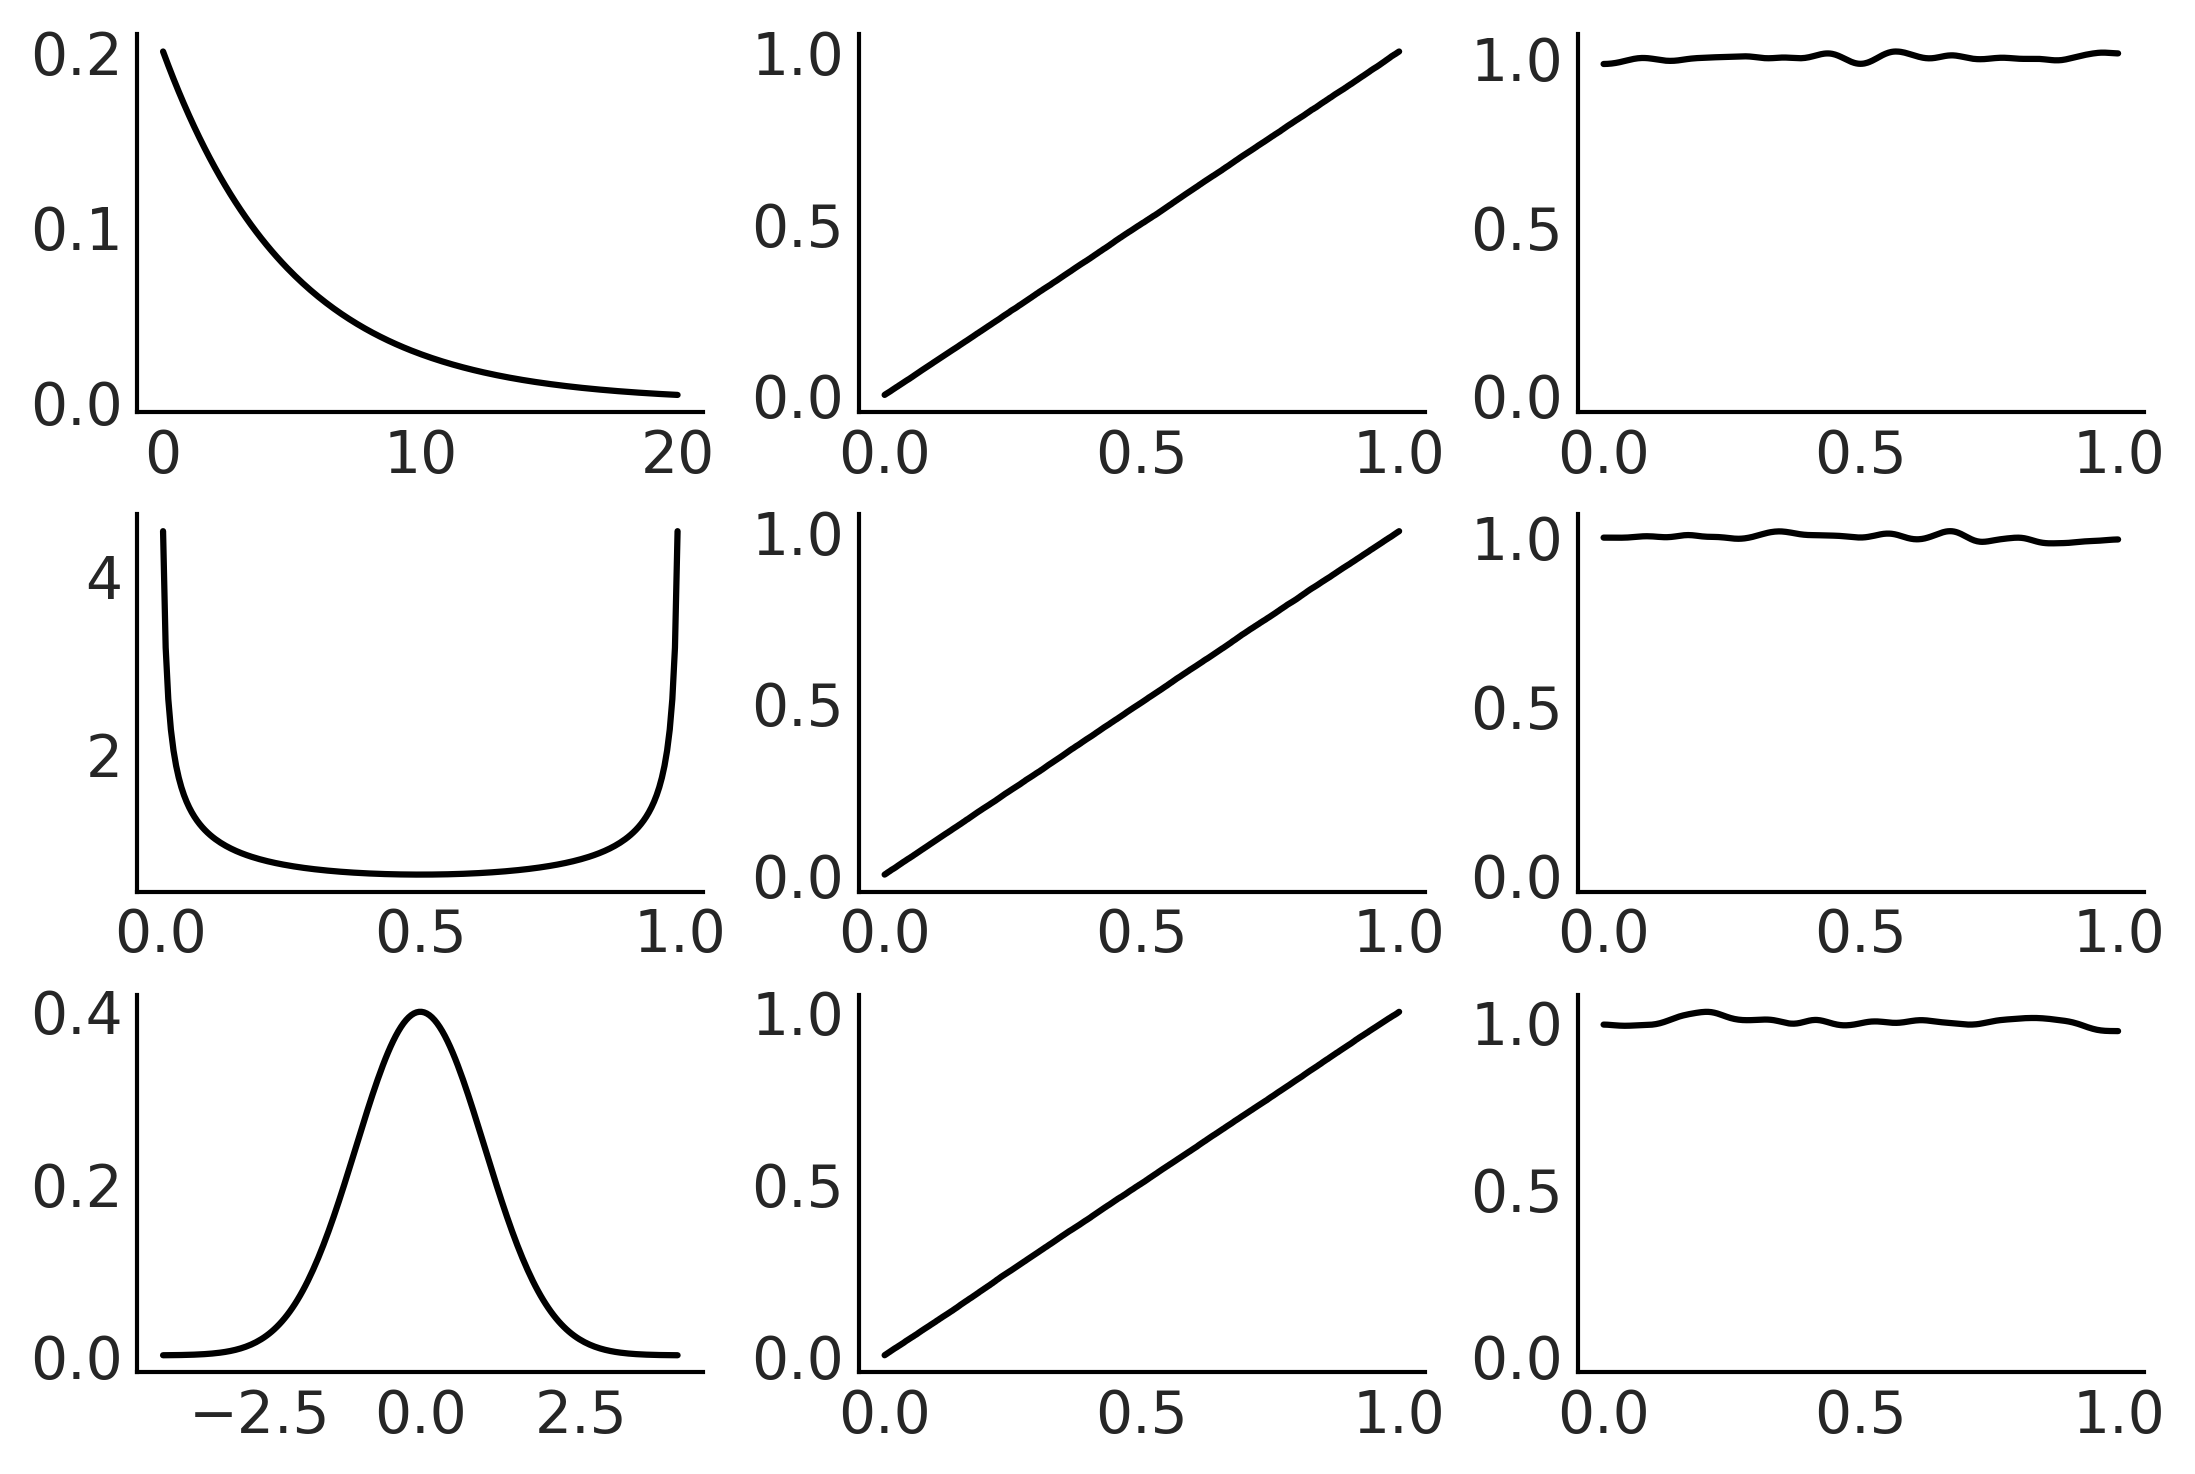

In [7]:
xs = (np.linspace(0, 20, 200), np.linspace(0, 1, 200), np.linspace(-4, 4, 200))
dists = (stats.expon(scale=5), stats.beta(0.5, 0.5), stats.norm(0, 1))


_, ax = plt.subplots(3, 3)

for idx, (dist, x) in enumerate(zip(dists, xs)):
    draws = dist.rvs(100000)
    data = dist.cdf(draws)
    # PDF original distribution
    ax[idx, 0].plot(x, dist.pdf(x))
    # Empirical CDF
    ax[idx, 1].plot(np.sort(data), np.linspace(0, 1, len(data)))
    # Kernel Density Estimation
    az.plot_kde(data, ax=ax[idx, 2])

### 11.1.8. 期望类 Expectations

期望是总结随机分布质量中心的数值。对于离散型随机变量，期望为：$$\mathbb{E}(X) = \sum_x x P(X = x)$$

统计上还经常要评估离散程度。常用方差来表示，它同样是一种期望：$$\mathbb{V}(X) = \mathbb{E}(X - \mathbb{E}X)^2 = \mathbb{E}(X^2 ) - (\mathbb{E}X)^2$$

期望的几个性质：
$$\mathbb{E}(cX) = c\mathbb{E}(X)$$

其中 c 为常数。
$$\mathbb{E}(X + Y) = \mathbb{E}(X) + \mathbb{E}(Y)$$

无论 X 和 Y 是否独立。    
    
我们定义 $X$ 的 n 阶距为 $\mathbb{E}(X^n)$，其中 $n$ 为正整数。 $X$ 的期望值是一阶距，方差是二阶距。三阶距是偏度，期望为 $\mu$ 和标准差为 $\sigma$ 随机变量 $X$ 的三阶距为：
$$\text{skew}(X) = \mathbb{E}\left(\frac{X -\mu}{\sigma}\right)^3$$

将偏斜计算为标准化量（即减去平均值并除以标准差）的原因是为了使偏斜独立于 $X$。    
举例：Beta(2,2) 偏度为0，代表分布是对称的；Beta(2,5) 偏度大于0，；Beta(5,2) 偏度小于0。
    



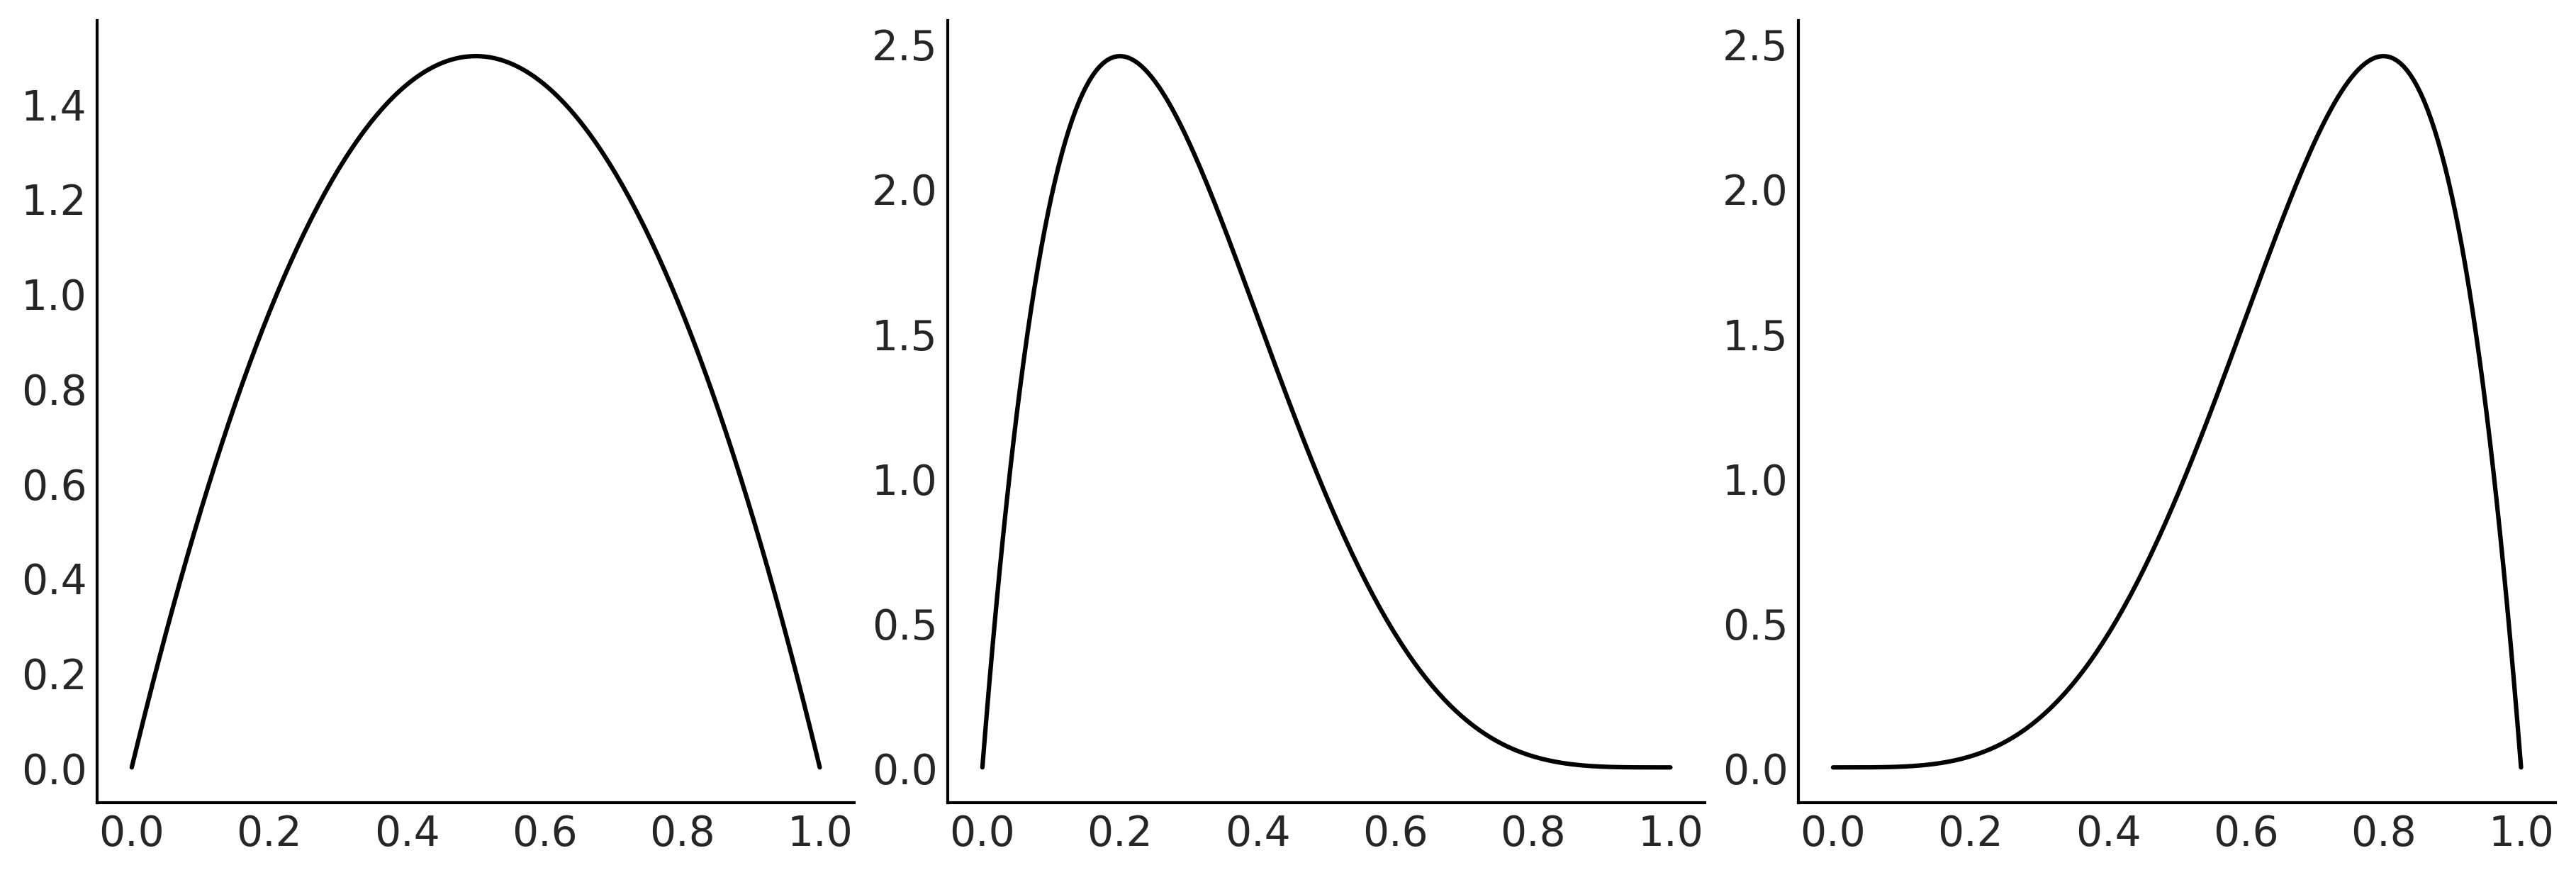

In [8]:
xs = (np.linspace(0, 1, 200), np.linspace(0, 1, 200), np.linspace(0, 1, 200))
dists = (stats.beta(2,2), stats.beta(2, 5), stats.beta(5, 2))


_, ax = plt.subplots(1, 3, figsize = (12, 4))

for idx, (dist, x) in enumerate(zip(dists, xs)):
    draws = dist.rvs(100000)
    data = dist.cdf(draws)
    ax[idx].plot(x, dist.pdf(x))

四阶距是峰度 kurtosis，描述尾部的行为：
$$\text{Kurtosis}(X) = \mathbb{E}\left(\frac{X -\mu}{\sigma}\right)^4 - 3 $$

公式中减3的是为了让高斯分布的峰度为0，因此公式表达的是本分布的峰度与高斯分布的峰度的差异。    

### 11.1.9. 转换
将随便变量 $X$ 带入函数 $g$，得到新的随机变量 $Y = g(X)$。如果我们知道 $X$ 的分布函数，如何求出 $Y$ 的分布呢？    
最简单的方法是从 $X$ 抽样转换并绘制分布图。还有其它方法，其中之一是变量变换方法 change of variables。    
    
如果 $X$ 是连续型随机变量，而 $g$ 是单调函数，那么 $Y$ 的 PDF 为：$$p_Y(y) = p_X(x) \left| \frac{dx}{dy} \right|$$    

推导如下：
$$
\begin{split}
   F_Y(y) =& P(Y \le y) \\
          =& P(g(X) \le y) \\
          =& P(X \le g^{-1}(y)) \\
          =& F_X(g^{-1}(y)) \\
          =& F_X(x) \\
\end{split}
$$

然后应用链式法则：
$$p_Y(y) = p_X(x) \frac{dx}{dy}$$

多元随机变量也类似，省略。


### 11.1.10. 极限
大数定律和中心极限定律是最知名的两条定律。

#### 11.1.10.1. 大数定律 Law of Large Numbers (LLN)
大数定律告诉我们，随着样本数量的增加，独立同分布随机变量的样本均值收敛到随机变量的期望值。    
注意：这对于某些分布（例如柯西分布（没有均值或有限方差））而言不成立。    
    
#### 11.1.10.2. 中心极限定律 Central Limit Theorem (CLT)
中心极限定理告诉我们，随着样本数量的增加，独立同分布随机变量的样本均值的分布收敛到正态分布。
$$\bar X_n \dot \sim \mathcal{N} \left (\mu, \frac{\sigma^2} {n} \right)$$

满足中心极限定理，必须满足以下假设：

- 这些值是独立采样的
- 每个值都来自相同的分布
- 分布的平均值和标准差必须是有限的

注意：标准1和2可以放宽一些，我们仍然会得到近似高斯分布，但无法摆脱标准3。对于没有定义均值或方差的分布（例如柯西分布），该定理不适用。柯西分布的样本均值仍然服从柯西分布。


### 11.1.11. 马尔科夫链 Markov Chains

马尔科夫链是一种随机过程，未来状态仅取决于当前状态：$$P(X_{n+1} = j \mid X_n = i, X_{n-1} = i_{n-1} , \dots, X_0 = i_0) = P(X_{n+1} = j \mid X_n = i)$$

马尔可夫链可视化的一种有效的方法是想象你或某个物体在空间中移动。如果空间有限，这个类比就更容易理解。    
例如像跳棋一样移动方板上的棋子或访问不同城市的销售人员。这种情况下可以提出以下问题：访问一个州（棋盘上的特定方块、城市等）的可能性有多大？如果我们不断从一个州转移到另一个州，从长远来看我们将在每个州花费多少时间？     
    
以下是四个马尔科夫链的例子：
![](markov_chains_graph.png)

研究马尔科夫链的一种便捷方法是收集每一步的转移概率并将其组合成转移矩阵。对于上面的a例子转移矩阵为：
$$\begin{bmatrix}
0.9 & 0.1 \\
0.8 & 0.2
\end{bmatrix}$$

而b例子转移矩阵为：
$$\begin{bmatrix}
0 & 0 & 1 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 0 & 0 & 0 \\
2 & 0 & 0 & 0 & 1 & 0 & 0 \\
3 & 0 & 0 & 0 & 0 & 1 & 0 \\
4 & 0 & 0 & 0 & 0 & 0 & 1 \\
5 & 1 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}$$



矩阵的第 i 行第 j 列的元素是从状态 i 转移到状态 j 的概率。    

在研究马尔可夫链时，我们有理由定义单个状态的属性以及整个链的属性。例如，如果一个链反复返回到一个状态，我们称该状态为常返状态。相反，一个瞬态状态是链最终会永远离开的状态，例如在上图的例子(d)，除了0或N的所有状态都是瞬态的。此外，我们也可以称一个链为不可约的，如果它可以在有限步骤内从任何状态到达任何其他状态。例如例子(c)，它不是不可约的，因为状态1、2和3与状态A和B是断开的。    
    
理解马尔可夫链的长期行为是有意义的。前面提到的常返和瞬态的概念对于理解这种长期运行行为非常重要。如果我们有一个包含瞬态和常返状态的链，该链可能会在瞬态状态中花费时间，但最终会在常返状态中花费所有的时间。我们可以自然地提问，链将在每个状态中停留多长时间。答案是通过找到链的稳态分布 stationary distribution 。    
    
对有限状态空间的马尔可夫链，稳态分布 $s$ 满足 $sT = s$。也就是对本分布来说，不受状态转移矩阵 $T$ 的变换影响。    
    
有趣的是在一定条件下，马尔可夫链的稳态分布是唯一的。这些条件是：链必须是不可约的和正常的。     
比如上图例子中，(d) 的稳定分布不唯一，分别是 $s_0=(1, 0, \dots , 0)$ 和 $s_N=(0, 0, \dots , 1)$，它代表了赌徒A或B输光了所有的钱；而 (b) 的稳定分布唯一，$s=(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)$    
    
如果概率质量函数满足可逆性条件（也称为详细平衡），即对所有的i和j都有 $s_i t_{ij} = s_j t_{ji}$，可以保证 $s$ 这是马尔可夫链转移矩阵 $T = t_{ij}$ 的稳态分布。这样的马尔可夫链被称为可逆的。在推理方法一节中，我们将使用这个属性来说明为什么Metropolis-Hastings能够保证在渐进意义上有效。    
    
马尔科夫链满足中心极限定律，但是要除以有效样本量 effective sample size (ESS)。

## 11.2. 熵 Entropy

在维也纳的*Zentralfriedhof*，我们可以找到路德维希·玻尔兹曼的墓碑。他的墓碑上刻着 $S = k \log W$，这是一种美妙的方式，表明热力学第二定律是概率定律的结果。玻尔兹曼通过这个等式为现代物理学的一个支柱 —— 统计力学的发展做出了贡献。统计力学描述了如温度这样的宏观观测如何与微观的分子世界相关。想象一下一杯水，我们的感官感知到的基本上是杯子里大量水分子的平均行为。水分子排列数量会与温度相关。随着我们降低温度，可能的排列会越来越少，直到仅有找一种。此时温度为达到了0开尔文，这是宇宙中可能的最低温度！如果我们增加问题，我们会发现分子有越来越多的排列方式。

![](entropy_T.png)



当温度为0开尔文时，水分子的排列方式只能有一种，状态是确定性的；当温度越来越高时，水分子的排列可能越来越多，状态越来越不确定。由此，我们可以将熵视为不确定性的衡量方式。    
     
熵的概念不仅适用于分子。它还可以应用于像素的排列、文本中的字符、音符、袜子、酵母面包中的气泡等等。熵如此灵活的原因是它量化了对象的排列， 这一底层分布的属性。分布的熵越大，该分布的信息量就越少。“42”比“42±5”更确定，而后者比“任意实数”更确定。熵可以将这些定性观察转化为定量数字。    
    
熵的概念适用于连续分布和离散分布，但使用离散状态更容易思考它，我们将在本节的其余部分看到一些示例。但请记住，相同的概念适用于连续情况。    
    
对有 $n$ 种可能得分布 $p$ 来说，熵的定义是：
$$H(p) = - \mathbb{E}[\log{p}] = -\sum_{i}^n p_i \log{p_i}$$

这只是 $S = k \log W$ 的另一种写法。使用 $H$ 替换掉 $S$ 并且设置 $k = 1$，而玻尔兹曼的 $W$ 是所有可能不同结果的总数：
$$W = \frac{N!}{n_1!n_2! \cdots n_t!}$$

可以理解为投掷一个 $t$ 面的骰子 $N$ 次。当 $N$ 特别大时，可以用斯特林近似 $x! \approx (\frac{x}{e})^x$。
$$W =  \frac{N^N}{n_1^{n_1} n_2^{n_2} \cdots n_t^{n_t}} e^{(n_1 n_2 \cdots n_t-N)}$$
    
由于 $p_i = \frac{n_i}{N}$
$$W = \frac{1}{p_1^{n_1} p_2^{n_2} \cdots p_t^{n_t}}$$

最终转换为
$$\log W = -\sum_{i}^n p_i \log{p_i}$$

下面用python演示如何计算熵

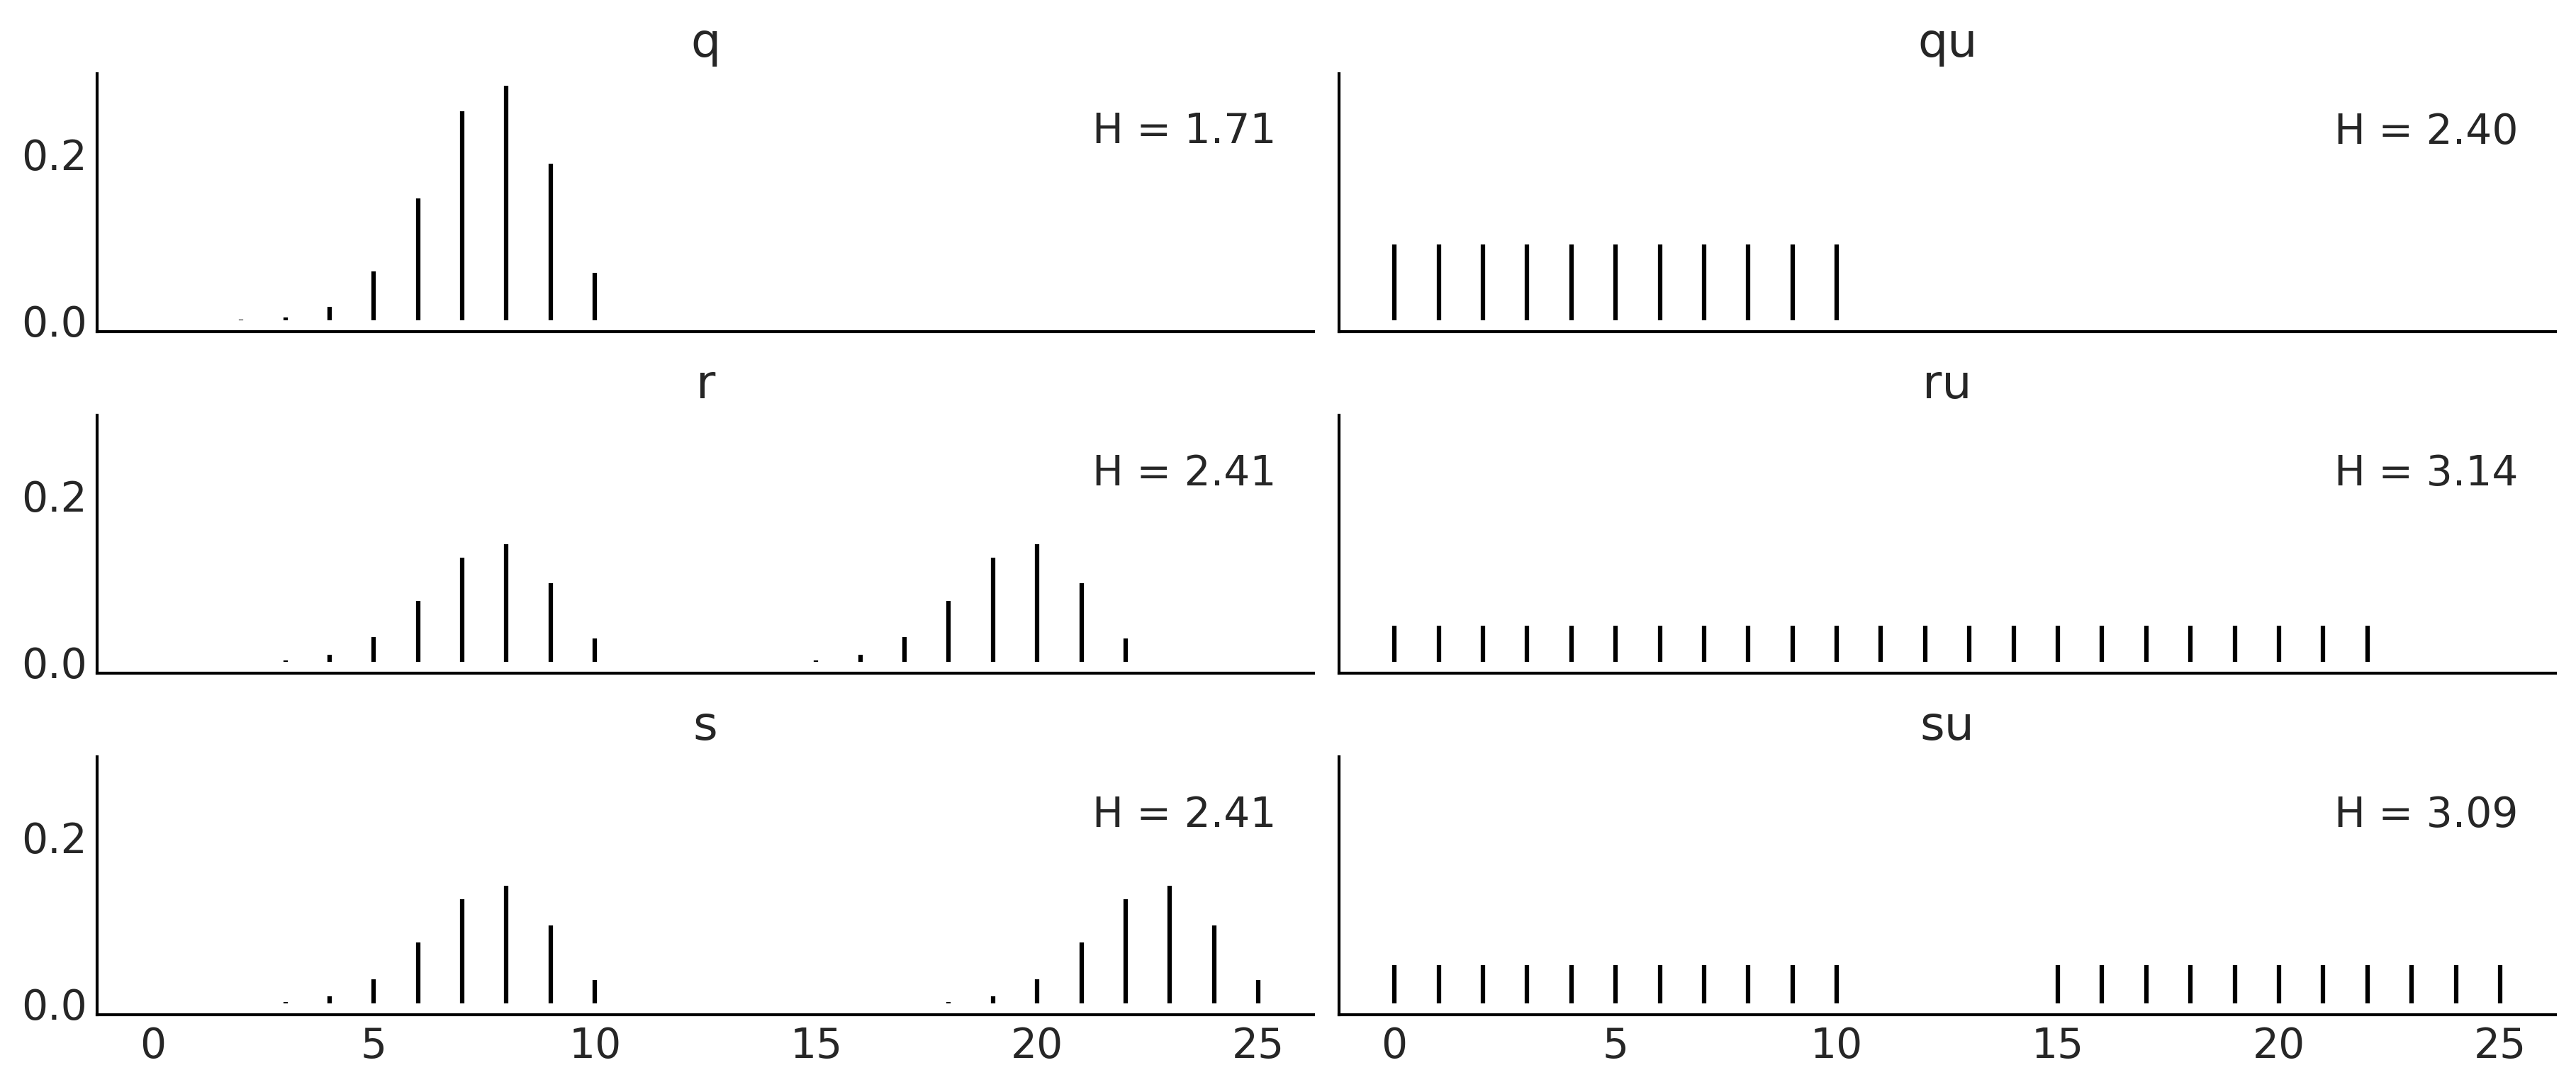

In [9]:
x = range(0, 26)
q_pmf = stats.binom(10, 0.75).pmf(x)
qu_pmf = stats.randint(0, np.max(np.nonzero(q_pmf))+1).pmf(x)
r_pmf = (q_pmf + np.roll(q_pmf, 12)) / 2
ru_pmf = stats.randint(0, np.max(np.nonzero(r_pmf))+1).pmf(x)
s_pmf = (q_pmf + np.roll(q_pmf, 15)) / 2
su_pmf = (qu_pmf + np.roll(qu_pmf, 15)) / 2

_, ax = plt.subplots(3, 2, figsize=(12, 5), sharex=True, sharey=True,
                     constrained_layout=True)
ax = np.ravel(ax)

zipped = zip([q_pmf, qu_pmf, r_pmf, ru_pmf, s_pmf, su_pmf],
             ["q", "qu", "r", "ru", "s", "su"])
for idx, (dist, label) in enumerate(zipped):
    ax[idx].vlines(x, 0, dist, label=f"H = {stats.entropy(dist):.2f}")
    ax[idx].set_title(label)
    ax[idx].legend(loc=1, handlelength=0)

以上是 6 个分布及对应熵。

- 最集中向中心的且离散度最小的是 $q$ ， 它的熵最小；
- $qu$ 同样有11种可能但是均匀分布，熵比前者要大，且11种可能得分布中没有比均匀分布更大熵的分布；
- $r$ 是 $qu$ 继续加工出来的，比 $qu$ 变换过来的，有更多种取值可能，分布更离散，熵也更大；
- $ru$ 与 $r$ 取值空间相同的均分分布，熵继续增加；
- $s$ 与 $r$ 类似，但是两峰间距离更远，熵与 $r$ 相同；
- $su$ 是 $qu$ 加工的，它虽然更离散但是取值可能性比 $qu$ 少，熵小于 $qu$

## 11.3. KL散度 Kullback-Leibler Divergence

在统计中常常用一个分布 $q$ 去代表另一个分布 $p$，比如 $p$ 未知但是可以用 $q$ 近似，后者 $p$ 比较难计算时。此时产生一个问题，$q$ 代替 $p$ 损失了多少信息，或者说引入了多少额外的不确定性。    
根据熵的定义，我们可以通过计算 $log(p)$ 和 $log(q)$ 的差异来衡量。这被称为 KL散度：
$$\mathbb{KL}(p \parallel q) = \mathbb{E}_p[\log{p}-\log{q}]$$   

$\mathbb{KL}(p \parallel q)$ 给出了 $q$ 代替 $p$ 时的对数概率平均差异。因为事件实际是以 $p$ 的概率发生的，所以对离散分布来说：
$$\mathbb{KL}(p \parallel q) = \sum_{i}^n p_i (\log{p_i} - \log{q_i})$$

使用对数计算的性质，可以转为更常见的表示方法：
$$\mathbb{KL}(p \parallel q)  = \sum_{i}^n p_i \log{\frac{p_i}{q_i}}$$

也可以转为：
$$\mathbb{KL}(p \parallel q) = - \sum_{i}^n p_i (\log{q_i} - \log{p_i})$$

将其展开可以得到：
$$\mathbb{KL}(p \parallel q) =  \overbrace{-\sum_{i}^n p_i \log{q_i}}^{H(p, q)} -  \overbrace{\left(-\sum_{i}^n p_i \log{p_i}\right)}^{H(p)}$$

其中 $H(p)$ 代表 $p$ 分布的熵，$H(p, q) = - \mathbb{E}_p[\log{q}]$ 有点像计算 $q$ 的熵但是每种可能出现的概率是 $p$。   
   
由上可以得到：
$$H(p, q) = H(p) + D_\text{KL}(p \parallel q)$$    
    
这表明 KL 散度可以有效地解释为 $q$ 代替 $p$ 增加的熵。

为了更加指标，我们将计算 KL 散度的一些值并绘制它们，继续使用熵一节中的例子：

/var/folders/mf/vz25j9w14ng0kgrg7jz5tc7w0000gn/T/ipykernel_95623/3045023848.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap()


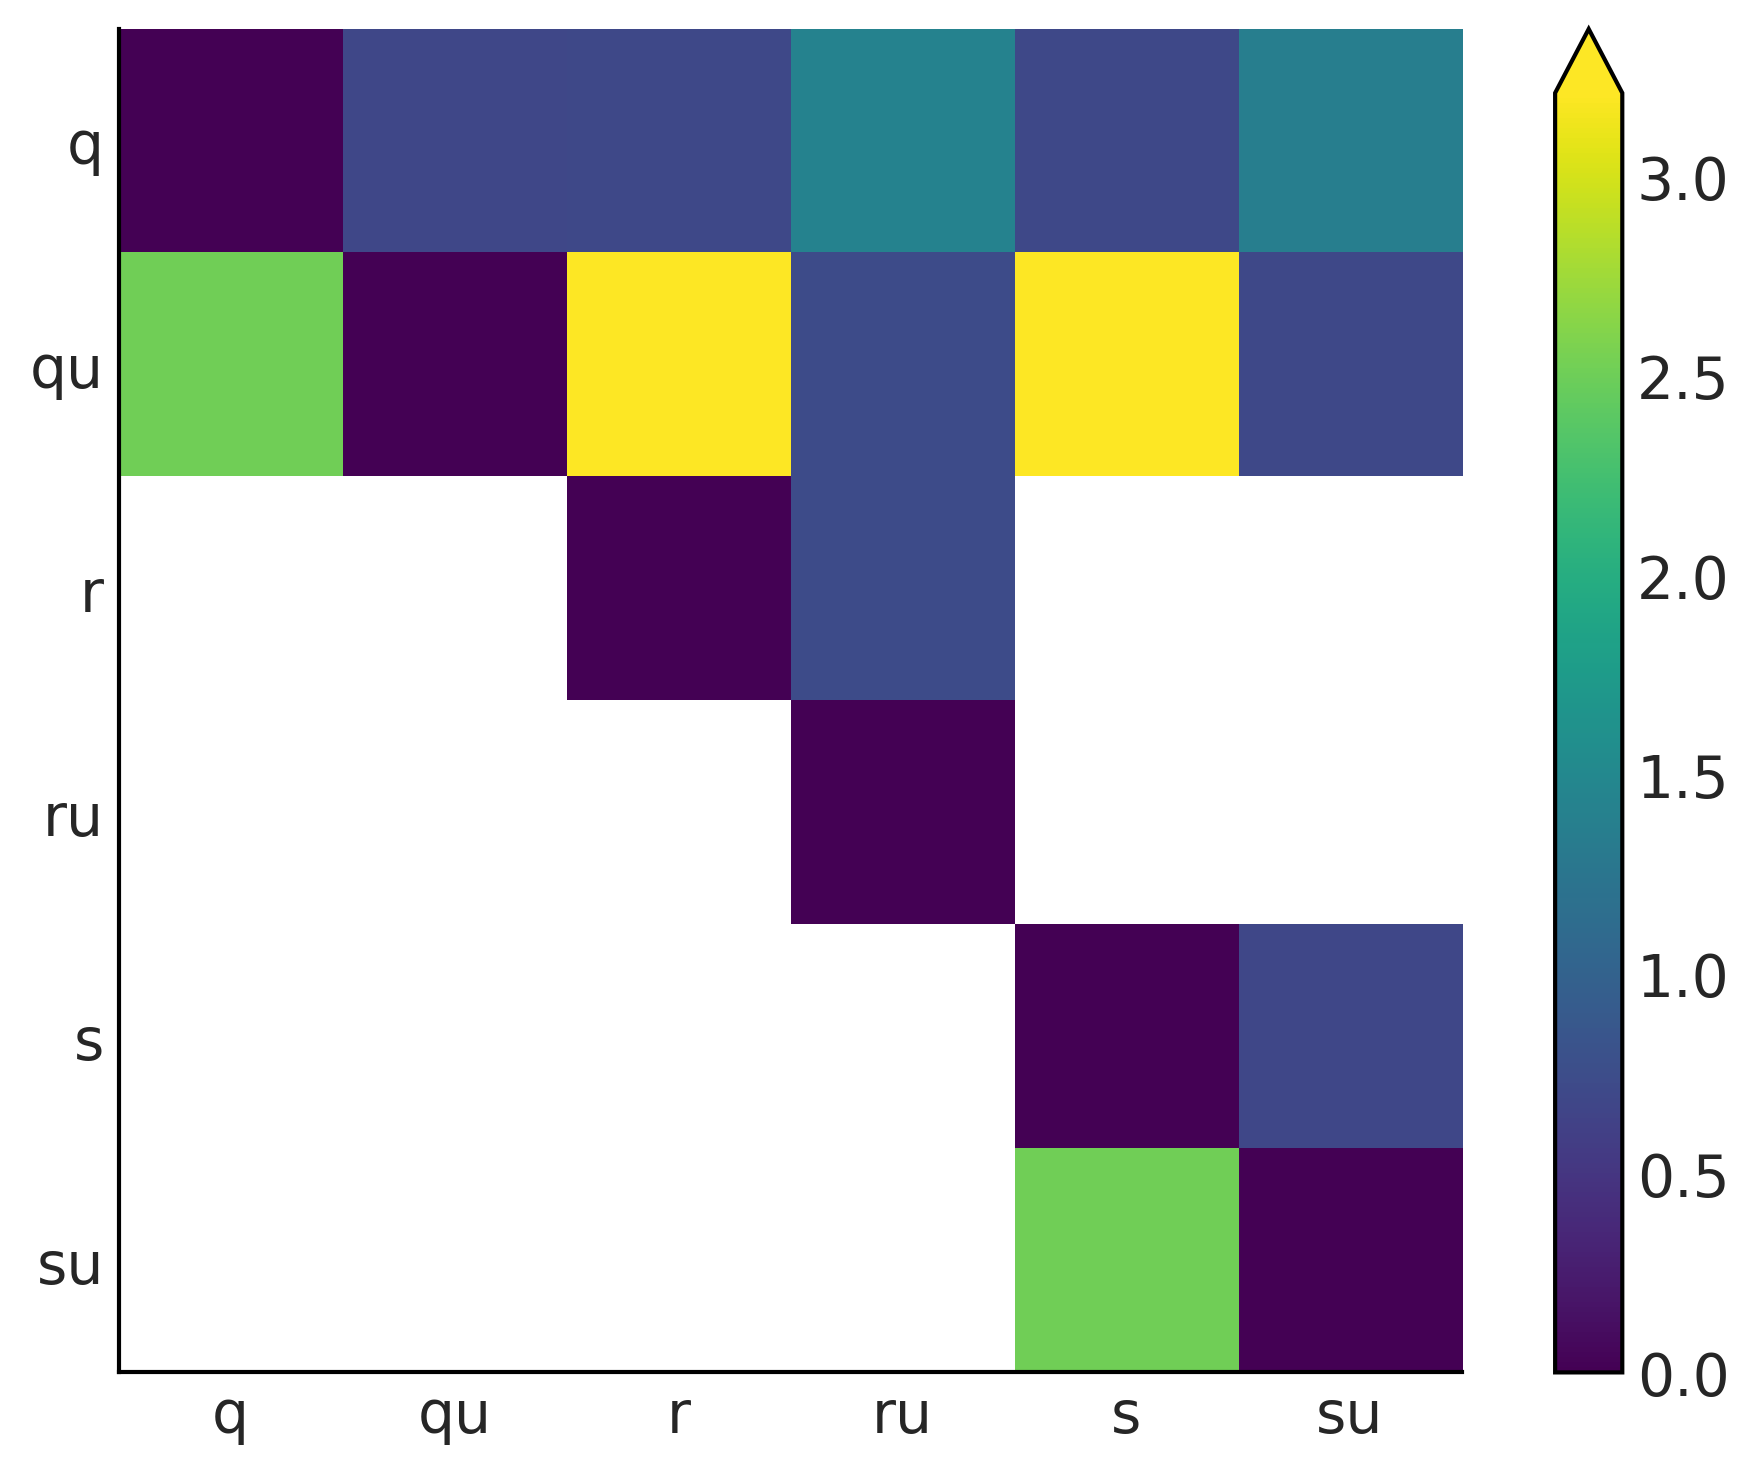

In [20]:
dists = [q_pmf, qu_pmf, r_pmf, ru_pmf, s_pmf, su_pmf]
names = ["q", "qu", "r", "ru", "s", "su"]

fig, ax = plt.subplots()
KL_matrix = np.zeros((6, 6))
for i, dist_i in enumerate(dists):
    for j, dist_j in enumerate(dists):
        KL_matrix[i, j] = stats.entropy(dist_i, dist_j)

ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.set_cmap("viridis")
cmap = plt.cm.get_cmap()
cmap.set_bad('w', 0.3)
im = ax.imshow(KL_matrix)
fig.colorbar(im, extend="max");

首先上图不是对称的，因为 $\mathbb{KL}(p \parallel q)$ 并不一定与 $\mathbb{KL}(q \parallel p)$ 相等；其次有一些空白区域，它们代表无穷大。KL 散度的定义使用中有以下约定：
$$0 \log \frac{0}{0} = 0, \quad
0 \log \frac{0}{q(\boldsymbol{x})} = 0, \quad
p(\boldsymbol{x}) \log \frac{p(\boldsymbol{x})}{0} = \infty$$

我们可以基于 KL 散度，在计算预期对数逐点预测密度时使用 log-score 。假设我们有 $k$ 个模型 $\{q_{M_1}, q_{M_2}, \cdots q_{M_k}\}$，并且假设我们知道真实的模型 $M_0$，则我们可以计算：
$$
\begin{split}
        \mathbb{KL}(p_{M_0} \parallel q_{M_1}) =&\; \mathbb{E}[\log{p_{M_0}}] - \mathbb{E}[\log{q_{M_1}}] \\
        \mathbb{KL}(p_{M_0} \parallel q_{M_2}) =&\; \mathbb{E}[\log{p_{M_0}}] - \mathbb{E}[\log{q_{M_2}}] \\
        &\cdots \\
        \mathbb{KL}(p_{M_0} \parallel q_{M_k}) =&\; \mathbb{E}[\log{p_{M_0}}] - \mathbb{E}[\log{q_{M_k}}]
    \end{split}
$$

以上似乎没有用，因为显示中我们不知道 $M_0$。但是由于所有比较中的 $p_{M_0}$ 都是相同的，所以基于KL散度构建一个排名等同于基于 log-score 构建一个排名。这是一个技巧，它意味着我们可以通过比较 log-score 来间接比较KL散度，即使我们可能无法直接计算KL散度。这在模型选择或比较中是非常有用的，因为 log-score 通常比KL散度更容易计算。

## 11.4. 信息准则 Information Criterion

信息准则是统计模型预测准确性的度量。它考虑模型对数据的拟合程度，并按模型的复杂性进行惩罚。有很多种信息准则，其中非贝叶斯领域最出名的是赤池信息准则 Akaike Information Criterion (AIC)。它由两部分组成，第一部分是模型对数据的拟合程度，第二部分是模型的复杂度：
$$AIC = -2 \sum_{i}^{n} \log p(y_i \mid \hat{\theta}_{mle}) + 2 p_{AIC}$$

其中 $\hat{\theta}_{mle}$ 是参数 $\theta$ 的最大似然估计，$p_{AIC}$ 是模型的参数数量。   
    
AIC 在非贝叶斯环境中相当流行，但通用性不足以处理贝叶斯模型。它不使用完整的后验分布，因此丢弃了潜在有用的信息。一般来说，当我们从平坦先验转向弱信息或信息丰富的先验时，或如果我们在模型中添加更多结构（例如分层模型），AIC 的表现会越来越差。AIC 假设后验可以用高斯分布很好地表示（至少渐进地），但是对于许多模型来说情况并非如此，包括分层模型、混合模型、神经网络等。总之，我们希望使用一些更好的模型备择方案。    
   
广泛适用的信息准则 Widely applicable Information Crieria (WAIC) 可以被视为是 AIC 的贝叶斯版本。同样有两部分组成，最大的不同是第一部分使用完整的后验分布：
$$WAIC =  \sum_i^n \log \left(\frac{1}{s} \sum_{j}^S p(y_i \mid \boldsymbol{\theta}^j) \right) \; - \sum_i^n  \left(\mathop{\mathbb{V}}_{j}^s \log p(Y_i \mid \boldsymbol{\theta}^j) \right)$$

其中第一项是逐点计算的对数似然，通过 $s$ 次后验分布抽样参数来计算以保持不确定性，它是现实中计算 ELPD 的可行方法。    
第二项有些奇怪，它是 $s$ 次后验分布抽样参数下的方差。抽样对后验细节阅敏感，惩罚就越大。我们还可以从另一个等价的角度来看这一点；更灵活的模型是能够有效容纳更多数据集的模型。例如，包含直线但也包含向上曲线的模型比仅允许直线的模型更灵活；因此，在后面的模型上通过后验评估的那些观察值的对数似然平均而言将具有更高的方差。如果更灵活的模型无法通过更高的估计 ELPD 来补偿这种损失，那么更简单的模型将被我们列为更好的选择。因此，方程中的方差项通过惩罚过于复杂的模型来防止过度拟合，并且可以将其宽松地解释为 AIC 中的参数的有效数量。    
    
AIC 和 WAIC 都没有试图衡量模型是否真实，它们只是比较替代模型的相对衡量标准。从贝叶斯的角度来看，先验是模型的一部分，但 WAIC 是根据后验进行评估的，并且先验效果只是通过影响所得后验的方式来间接考虑。还有其他信息标准，例如 BIC 和 WBIC 试图回答这个问题，并且可以被视为边际可能性的近似值，但我们不会在本书中讨论它们。

## 11.5. 深入LOO
正如本书中交叉验证和 LOO 一节中所讨论的，我们使用术语 LOO 来指代一种近似留一交叉验证 (LOO-CV) 的特定方法，称为帕累托平滑重要性采样留一次交叉验证 ( PSIS-LOO-CV)。    
    
LOO是WAIC的替代方案，实际上可以证明它们渐近收敛到相同的数值。而且 LOO 为从业者带来了两个重要的优势。它在有限样本设置中更加稳健，并且在计算过程中提供有用的诊断。    
    
在 LOO-CV 下新数据集的预期对数逐点预测密度为：
$$
\text{ELPD}_\text{LOO-CV} = \sum_{i=1}^{n} \log
    \int \ p(y_i \mid \boldsymbol{\theta}) \; p(\boldsymbol{\theta} \mid y_{-i}) d\boldsymbol{\theta}
$$

其中 $y_{-i}$ 代表排除 $i$ 后的数据集。    
    
现实中无法获取 $\theta$，所以我们使用后验分布的抽样来近似：
$$\sum_{i}^{n} \log
    \left(\frac{1}{s}\sum_j^s \ p(y_i \mid \boldsymbol{\theta_{-i}^j}) \right)$$

上述公式非常像 WAIC 中的第一项，只是每次排除一个样本，因此它不需要惩罚项。    
以上公式计算消耗非常大，好在 $n$ 次观测是条件独立的，可以用以下近似：
$$\text{ELPD}_{psis-loo} = \sum_i^n \log \sum_j^s w_i^j p(y_i \mid \boldsymbol{\theta}^j)$$

其中 $w$ 是归一化权重向量。    
    
计算 $w$ 需要通过重要性采样（Importance Sampling），它是一种用于估计目标分布属性的技术。如果我们有随机变量 $X$ 的样本，而且可以按每个点计算 $f(x)$ 和 $g(x)$，则重要性权重为：
$$w_i = \frac{f(x_i)}{g(x_i)}$$    
    
重要性采样（Importance Sampling）的计算步骤：

-   从分布 $g$ 中抽取 $N$ 个样本 $x_i$：这是从我们选择的易于采样的分布（也称为提议分布）中抽取样本的步骤；

-   计算每个样本的概率 $g(x_i)$：这是计算每个样本在提议分布 $g$ 下的概率；

-   在 $N$ 个样本 $x_i$ 上评估函数 $f$：这是计算目标函数 $f$ 在每个样本点上的值；

-   返回 $N$ 个样本对应的 $(x_i, w_i)$，带入需要的评估器中。    
    
下图显示了使用两个不同的提案分布来近似相同目标分布（虚线）的示例。在第一行，提案比目标分布更宽。在第二行，提案比目标分布更窄。正如我们所看到的，第一种情况的近似值更好。这是重要性抽样的一般特征。
![](importance_sampling.png)    
    
回到 LOO，我们计算的分布是后验分布。为了评估模型，我们需要来自留一后验分布的样本，因此我们要计算的重要性权重是：
$$w_i^j = \frac{p(\theta^j \mid y{-i} )}{p(\theta^j \mid y)} \propto \frac{1}{p(y_i \mid \theta^j)}$$

注意后验可能比 leave-one-out分布 有更细的尾部，正如我们在上图看到的那样，这可能会导致估计结果很差。从数学上讲，问题在于重要性权重可能具有很高甚至无限的方差。为了控制方差，LOO 应用了平滑过程，其中涉及用估计的帕累托分布中的值替换最大的重要性权重。而且要注意估计参数 $\hat{\kappa}$ 检测极具影响力的观察结果，即当被排除时对预测分布有很大影响的观察结果。一般来说大的 $\hat{\kappa}$ 代表数据或者模型有问题，特别是当 $\hat{\kappa} \ge 0.7$ 时。

## 11.6. 杰弗里斯先验的推导

单变量下 JP 的定义为：
$$p(\theta) = \sqrt{I(\theta)}$$    
其中 $I(\theta)$ 是 Fisher 信息：
$$I(\theta) = - \mathbb{E_{Y}}\left[\frac{d^2}{d\theta^2} \log p(Y \mid \theta)\right]$$

### 11.6.1. 二项分布参数的杰弗里斯先验

二项分布可以表示为：
$$p(Y \mid \theta) \propto \theta^{y} (1-\theta)^{n-y}$$

其中 $y$ 是成功次数，$n$ 是总次数。     
    
为了计算 Fisher 信息，我们需要计算对数似然：
$$\ell = \log(p(Y \mid \theta)) \propto y \log(\theta) + (n-y) \log(1-\theta)$$   

计算其二阶导数：
$$
\begin{aligned}
\begin{split}
\frac{d \ell}{d\theta} &= \frac{y}{\theta} - \frac{n-y}{1-\theta} \\
\frac{d^{2} \ell}{d \theta^{2}} &= -\frac{y}{\theta^{2}} - \frac{n-y}{ (1-\theta)^{2}}
\end{split}\end{aligned}
$$

将其带入 Fisher 信息公式：
$$I(\theta) = - \mathbb{E}_{Y}\left[-\frac{y}{\theta^{2}} + \frac{n-y}{ (1-\theta)^{2}} \right]$$

由于 $\mathbb{E}[y] = n\theta$，可写成：
$$I(\theta)= \frac{n\theta}{\theta^{2}} - \frac{n - n \theta}{(1-\theta)^{2}}$$

化简得：
$$I(\theta)= \frac{n}{\theta} - \frac{n (1 -\theta)}{(1-\theta)^{2}} = \frac{n}{\theta} - \frac{n}{(1-\theta)}$$

将分母通分得：
$$I(\theta)= \frac{n(1-\theta) - n\theta}{\theta(1-\theta)} = \frac{n}{\theta(1-\theta)}$$

如果忽略常数 $n$，则有：
$$I(\theta) \propto \frac{1}{\theta (1-\theta)} = \theta^{-1} (1-\theta)^{-1}$$

将其带入 JP 公式，最终得到结果：
$$p(\theta) \propto \sqrt{I(\theta)} \propto \sqrt{\theta^{-1} (1-\theta)^{-1}} = \theta^{-1/2} (1-\theta)^{-1/2}$$

### 11.6.2. 二项分布比例 $\kappa$ 的杰弗里斯先验

替换 $\theta = \frac{\kappa}{\kappa + 1}$：
$$p(Y \mid \kappa) \propto \left({\frac{\kappa}{\kappa + 1}}\right)^{y} \left(1-{\frac{\kappa}{\kappa +1}}\right)^{n-y}$$

可以写为：
$$p(Y \mid \kappa) \propto \kappa^y (\kappa + 1)^{-y} (\kappa +1)^{-n + y}$$

整理后：
$$p(Y \mid \kappa) \propto \kappa^y (\kappa + 1)^{-n}$$

取对数：
$$\ell = \log(p(Y \mid \kappa)) \propto y \log{\kappa} -n \log{(\kappa + 1)}$$

计算二阶导数：
$$
\begin{aligned}
\begin{split}
\frac{d \ell}{d{\kappa}} &= \frac{y}{\kappa} - \frac{n}{\kappa + 1} \\
\frac{d^2 \ell}{d {\kappa^2}} &= -\frac{y}{\kappa^2} + \frac{n}{(\kappa+1)^2}
\end{split}\end{aligned}
$$

则：
$$I(\kappa) = - \mathbb{E}_Y\left[-\frac{y}{\kappa^2} + \frac{n}{ (\kappa+1)^2} \right]$$    

由于 $\mathbb{E}[y] = n\frac{\kappa}{\kappa + 1}$，可写成：
$$I(\kappa) = \frac{n}{\kappa (\kappa + 1)} - \frac{n}{(\kappa + 1)^2}$$

通分得到：
$$I(\kappa) = \frac{n(\kappa + 1) - n\kappa}{\kappa(\kappa + 1)^2} = \frac{n}{\kappa(\kappa + 1)^2}$$

最终得到：
$$p(\kappa) \propto \sqrt{I(\kappa)} \propto \sqrt{\frac{1}{\kappa(\kappa + 1)^2}} = \kappa^{-1/2} (\kappa + 1)^{-1}$$

### 11.6.3. 二项分布似然的杰弗里斯后验

结合 $\theta$ 的杰弗里斯先验和二项分布似然：
$$p(\theta \mid Y) \propto  \theta^{y} (1-\theta)^{n-y} \theta^{-0.5} (1-\theta)^{-0.5} = \theta^{y-0.5} (1-\theta)^{n-y-0.5}$$

类似的结合 $\kappa$ 的杰弗里斯先验和二项分布似然：
$$p(\kappa \mid Y) \propto \kappa^y (\kappa + 1)^{-n}  \kappa^{-0.5} (1 + \kappa)^{-1} = \kappa^{(y-0.5)}  (\kappa + 1)^{(-n-1)})$$